<a href="https://colab.research.google.com/github/vovsiienko/IT496_Course_acitvities/blob/master/IT496_ViktoriiaO_Assignment11_CPM_PERT_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import tensorflow_probability as tfp
tfd=tfp.distributions

simulationDF=pd.read_csv('/content/drive/MyDrive/IT496/simulationDataset.csv')

simulationDF.head(2)

,A,B,C,D,E,F,G,H,I,J,EOP
0,6.779389,4.518081,4.588156,2.693674,5.198787,4.360078,6.896625,1.181040,13.967291,2.581787,NaN
1,6.653130,4.175826,2.546335,2.622374,5.509677,5.459227,3.933105,5.066621,19.884926,2.304569,NaN


In [4]:
paths = ['ADEJ','BCDEJ','BCFGJ', 'BCFHJ','BI']
pathsDF=pd.DataFrame(columns=paths)
ADEJ=[]
BCDEJ=[]
BCFGJ=[]
BCFHJ=[]
BI=[]


for index, row in simulationDF.iterrows():
  ADEJ.append(row['A']+row['D']+row['E']+row['J'])
  BCDEJ.append(row['B']+row['C']+row['D']+row['E']+row['J'])
  BCFGJ.append(row['B']+row['C']+row['F']+row['G']+row['J'])
  BCFHJ.append(row['B']+row['C']+row['F']+row['H']+row['J'])
  BI.append(row['B']+row['I'])

pathsDF['ADEJ'] = ADEJ
pathsDF['BCDEJ'] = BCDEJ
pathsDF['BCFGJ'] = BCFGJ
pathsDF['BCFHJ'] = BCFHJ
pathsDF['BI'] = BI
maxElement =pathsDF.idxmax(axis=1)
pathsDF['maxElement'] = maxElement

pathsDF.head(2)


,ADEJ,BCDEJ,BCFGJ,BCFHJ,BI,maxElement
0,17.253636,19.580484,22.944727,17.229141,18.485372,BCFGJ
1,17.089749,17.158780,18.419062,19.552577,24.060752,BI


In [5]:
#getting Frequence (No of cases) for path with Max value

pathsCounted = pd.DataFrame(columns=['maxElement','pathFrequency', 'relativeFrequency %'])

pathFrequency = pathsDF['maxElement'].value_counts()

relativeFrequency = pathFrequency*100/100000 
pathsCounted['pathFrequency'] =pathFrequency
pathsCounted['relativeFrequency %'] =relativeFrequency

pathsCounted['maxElement'] = pathFrequency.keys()



#print(pathFrequency)
print(pathsCounted)

      maxElement  pathFrequency  relativeFrequency %
BCDEJ      BCDEJ          34074               34.074
BCFGJ      BCFGJ          25620               25.620
BI            BI          21770               21.770
BCFHJ      BCFHJ          14629               14.629
ADEJ        ADEJ           3907                3.907


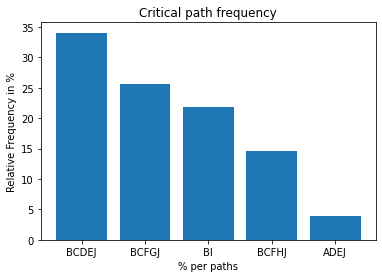

In [9]:
import matplotlib.pyplot as plt
data= relativeFrequency 
labels = pathsCounted['maxElement']
plt.bar(range(len(data)), data)
plt.xticks(range(len(data)), labels)

plt.xlabel('% per paths')
plt.ylabel('Relative Frequency in %')
plt.title('Critical path frequency')

plt.show()